In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
data = pd.read_csv('final_data.csv')
y_col = ['BulkModulus (GPa)', 'D_Bulk (GPa)']
# Split data into features (X) and target (Y)
X = data.drop(columns=y_col)
Y = data[y_col]

In [70]:
np.array(data.columns)

array(['No', 'a (Å)', 'delta', 'Tm (K)', 'D_Tm (K)', 'Hmix (kJ/mol)',
       'σHmix (kJ/mol)', 'Sid (kJ/mol)', 'Elec_nega', 'D_elec_nega',
       'VEC', 'd_VEC', 'BulkModulus (GPa)', 'D_Bulk (GPa)', 'Ag', 'Al',
       'As', 'Au', 'B', 'Ba', 'Be', 'Bi', 'Br', 'C', 'Ca', 'Cd', 'Ce',
       'Cl', 'Co', 'Cr', 'Cs', 'Cu', 'Dy', 'Er', 'Eu', 'F', 'Fe', 'Ga',
       'Gd', 'Ge', 'H', 'Hf', 'Hg', 'Ho', 'I', 'In', 'Ir', 'K', 'La',
       'Li', 'Lu', 'Mg', 'Mn', 'Mo', 'N', 'Na', 'Nb', 'Nd', 'Ne', 'Ni',
       'Ns', 'O', 'Os', 'P', 'Pb', 'Pd', 'Pr', 'Pt', 'Rb', 'Re', 'Rh',
       'Ru', 'S', 'Sb', 'Sc', 'Se', 'Si', 'Sm', 'Sn', 'Sr', 'Ta', 'Tb',
       'Te', 'Ti', 'Tl', 'Tm', 'V', 'W', 'Y', 'Yb', 'Zn', 'Zr', 'IMsp',
       'IMp', 'AMsp', 'AMp', 'SSsp', 'FCCp', 'B2p', 'BCCp', 'HCPp',
       '2BCCp', 'SSp', 'L12p', '2FCCp'], dtype=object)

In [71]:
cols = np.array(X.columns)
cols

array(['No', 'a (Å)', 'delta', 'Tm (K)', 'D_Tm (K)', 'Hmix (kJ/mol)',
       'σHmix (kJ/mol)', 'Sid (kJ/mol)', 'Elec_nega', 'D_elec_nega',
       'VEC', 'd_VEC', 'Ag', 'Al', 'As', 'Au', 'B', 'Ba', 'Be', 'Bi',
       'Br', 'C', 'Ca', 'Cd', 'Ce', 'Cl', 'Co', 'Cr', 'Cs', 'Cu', 'Dy',
       'Er', 'Eu', 'F', 'Fe', 'Ga', 'Gd', 'Ge', 'H', 'Hf', 'Hg', 'Ho',
       'I', 'In', 'Ir', 'K', 'La', 'Li', 'Lu', 'Mg', 'Mn', 'Mo', 'N',
       'Na', 'Nb', 'Nd', 'Ne', 'Ni', 'Ns', 'O', 'Os', 'P', 'Pb', 'Pd',
       'Pr', 'Pt', 'Rb', 'Re', 'Rh', 'Ru', 'S', 'Sb', 'Sc', 'Se', 'Si',
       'Sm', 'Sn', 'Sr', 'Ta', 'Tb', 'Te', 'Ti', 'Tl', 'Tm', 'V', 'W',
       'Y', 'Yb', 'Zn', 'Zr', 'IMsp', 'IMp', 'AMsp', 'AMp', 'SSsp',
       'FCCp', 'B2p', 'BCCp', 'HCPp', '2BCCp', 'SSp', 'L12p', '2FCCp'],
      dtype=object)

In [72]:
X['No']

0        2
1        2
2        2
3        2
4        2
        ..
1098     9
1099     9
1100     9
1101    10
1102    10
Name: No, Length: 1103, dtype: int64

In [74]:
properties = ['No', 'a (Å)', 'delta', 'Tm (K)', 'D_Tm (K)', 'Hmix (kJ/mol)','σHmix (kJ/mol)', 'Sid (kJ/mol)', 'Elec_nega', 'D_elec_nega', 'VEC', 'd_VEC']
atoms = ['Ag', 'Al', 'As', 'Au', 'B', 'Ba', 'Be', 'Bi', 'Br', 'C', 'Ca', 'Cd', 'Ce', 'Cl', 'Co', 'Cr', 'Cs', 'Cu', 'Dy', 'Er', 'Eu', 'F', 'Fe', 'Ga', 'Gd',
         'Ge', 'H', 'Hf', 'Hg', 'Ho', 'I', 'In', 'Ir', 'K', 'La', 'Li', 'Lu', 'Mg', 'Mn', 'Mo', 'N', 'Na', 'Nb', 'Nd', 'Ne', 'Ni', 'Ns', 'O', 'Os', 'P', 'Pb',
         'Pd', 'Pr', 'Pt', 'Rb', 'Re', 'Rh', 'Ru', 'S', 'Sb', 'Sc', 'Se', 'Si', 'Sm', 'Sn', 'Sr', 'Ta', 'Tb', 'Te', 'Ti', 'Tl', 'Tm', 'V', 'W', 'Y', 'Yb',
         'Zn', 'Zr']
phases = ['IMsp', 'IMp', 'AMsp', 'AMp', 'SSsp', 'FCCp', 'B2p', 'BCCp', 'HCPp', '2BCCp', 'SSp', 'L12p', '2FCCp']

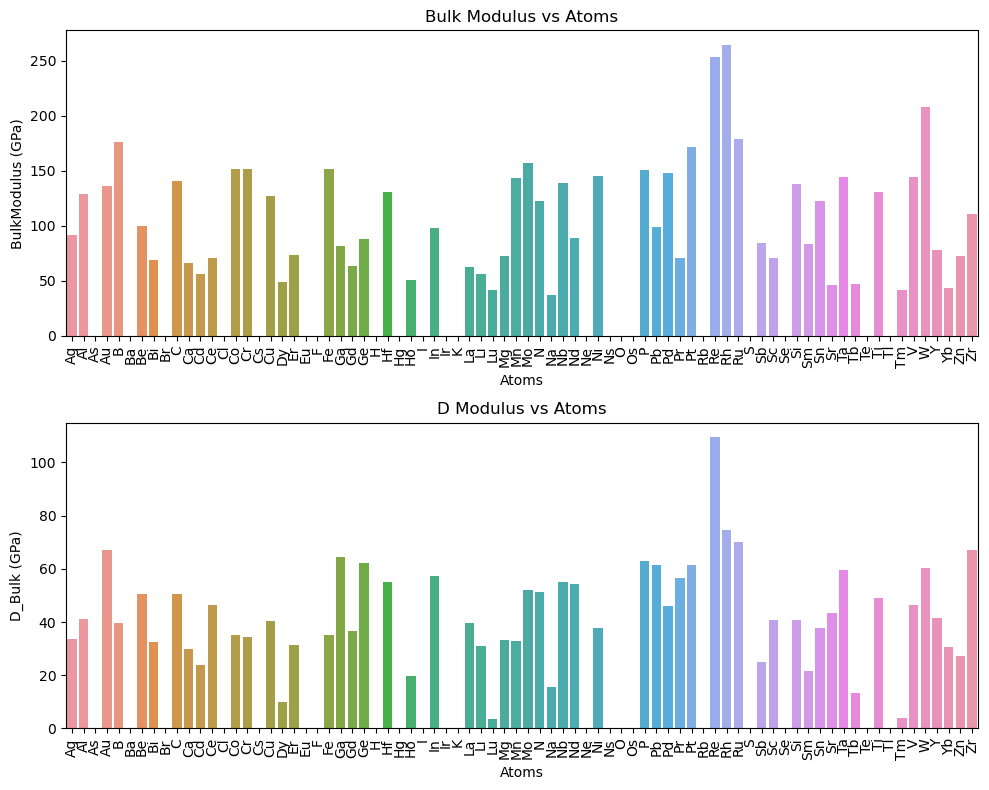

In [75]:
b1 = []
d1 = []
for a in atoms:
    b1.append(data[data[a]>0]['BulkModulus (GPa)'].mean(axis=0))
    d1.append(data[data[a]>0]['D_Bulk (GPa)'].mean(axis=0))

dict1 = {'atom':atoms, 'BulkModulus (GPa)':b1, 'D_Bulk (GPa)': d1}
df1 = pd.DataFrame(dict1)


# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot BulkModulus
sns.barplot(ax=axs[0], x='atom', y='BulkModulus (GPa)', data=df1)
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
axs[0].set_xlabel('Atoms')
axs[0].set_ylabel('BulkModulus (GPa)')
axs[0].set_title('Bulk Modulus vs Atoms')

# Plot D_Bulk
sns.barplot(ax=axs[1], x='atom', y='D_Bulk (GPa)', data=df1)
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
axs[1].set_xlabel('Atoms')
axs[1].set_ylabel('D_Bulk (GPa)')
axs[1].set_title('D Modulus vs Atoms')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

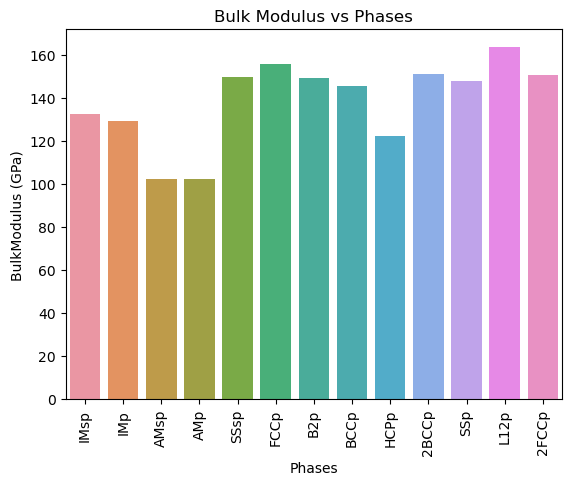

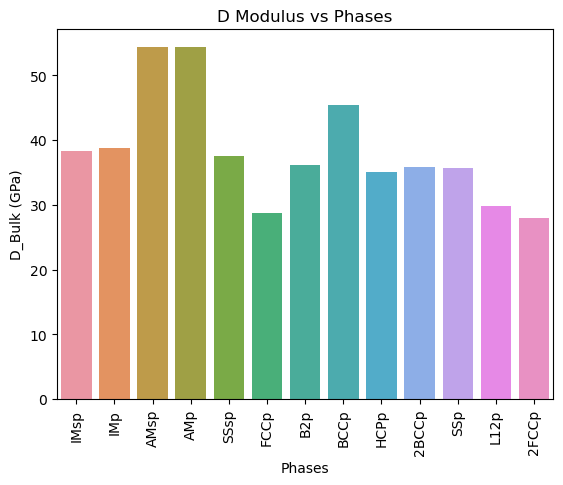

In [76]:
b = []
d = []
for a in phases:
    b.append(data[data[a] == 1]['BulkModulus (GPa)'].mean(axis=0))
    d.append(data[data[a] == 1]['D_Bulk (GPa)'].mean(axis=0))

dict = {'phase':phases, 'BulkModulus (GPa)':b, 'D_Bulk (GPa)': d}
df = pd.DataFrame(dict)

plt.figure()
sns.barplot(x='phase', y='BulkModulus (GPa)', data=df)
plt.xticks(rotation=90)
plt.xlabel('Phases')
plt.ylabel('BulkModulus (GPa)')
plt.title('Bulk Modulus vs Phases')
plt.show()

plt.figure()
sns.barplot(x='phase', y='D_Bulk (GPa)', data=df)
plt.xticks(rotation=90)
plt.xlabel('Phases')
plt.ylabel('D_Bulk (GPa)')
plt.title('D Modulus vs Phases')
plt.show()

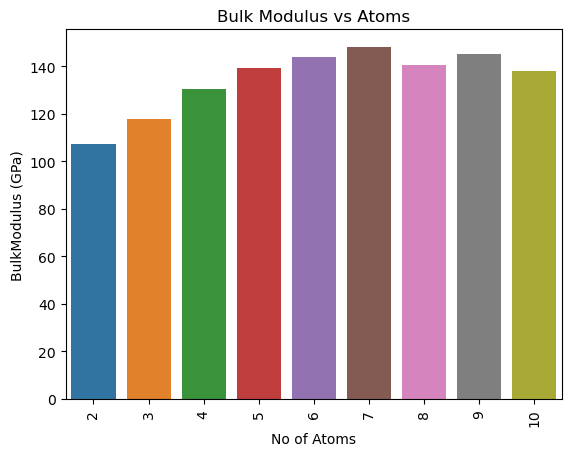

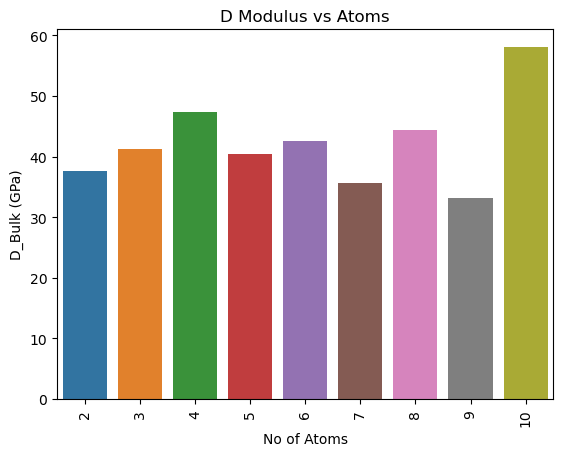

In [77]:
b2 = []
d2 = []
num = [2,3,4,5,6,7,8,9,10]
for a in num:
    b2.append(data[data['No'] == a]['BulkModulus (GPa)'].mean(axis=0))
    d2.append(data[data['No'] == a]['D_Bulk (GPa)'].mean(axis=0))

dict2 = {'atom':num, 'BulkModulus (GPa)':b2, 'D_Bulk (GPa)': d2}
df2 = pd.DataFrame(dict2)

plt.figure()
sns.barplot(x='atom', y='BulkModulus (GPa)', data=df2)
plt.xticks(rotation=90)
plt.xlabel('No of Atoms')
plt.ylabel('BulkModulus (GPa)')
plt.title('Bulk Modulus vs Atoms')
plt.show()

plt.figure()
sns.barplot(x='atom', y='D_Bulk (GPa)', data=df2)
plt.xticks(rotation=90)
plt.xlabel('No of Atoms')
plt.ylabel('D_Bulk (GPa)')
plt.title('D Modulus vs Atoms')
plt.show()

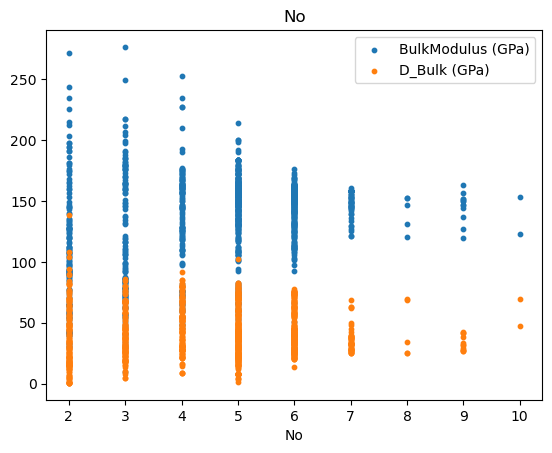

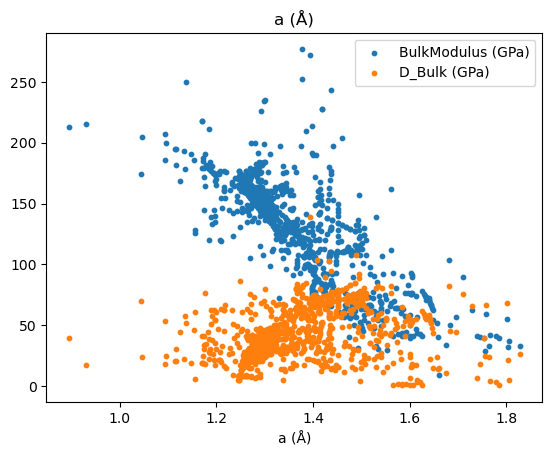

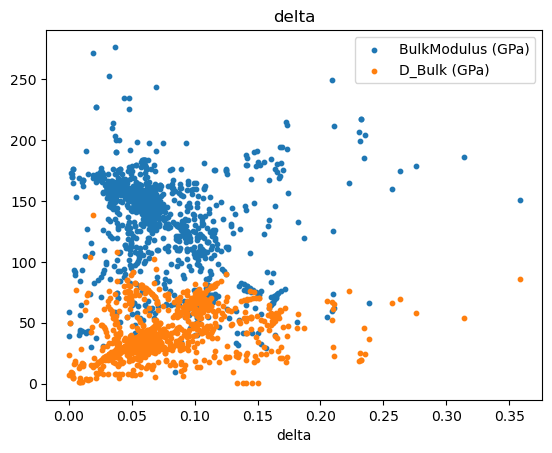

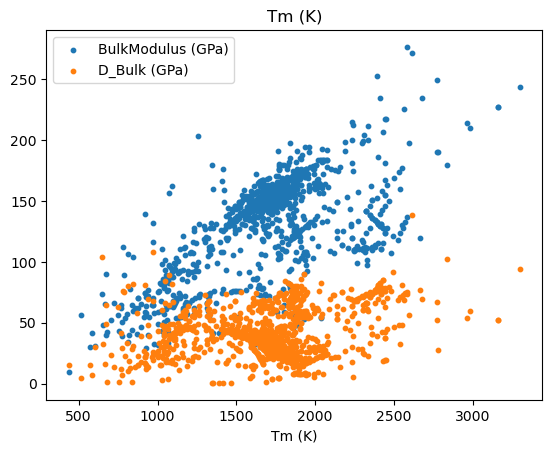

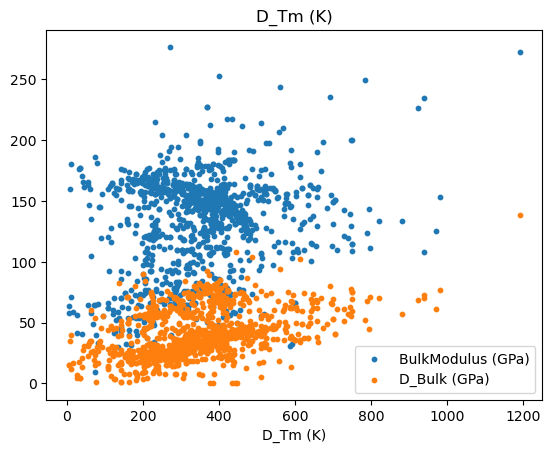

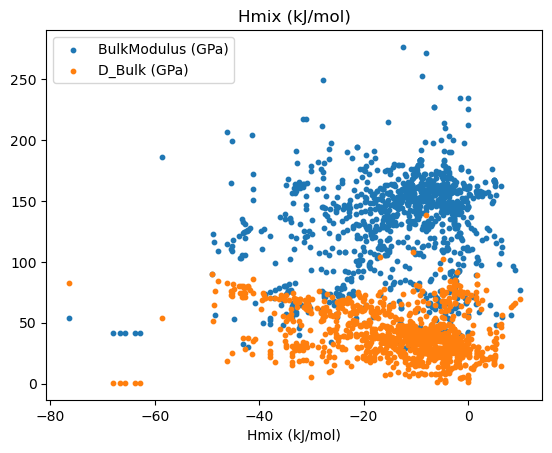

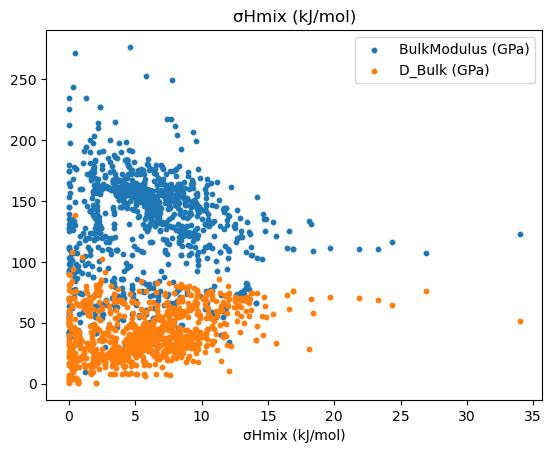

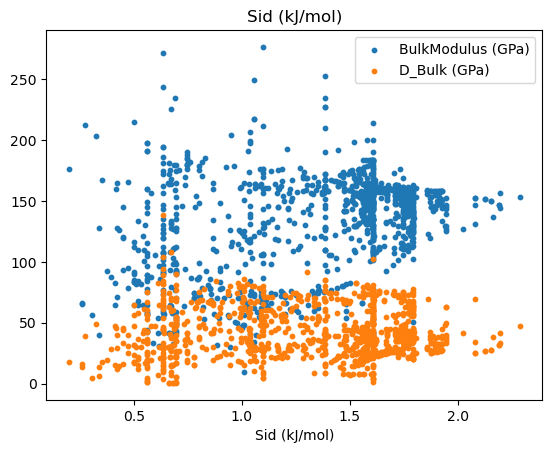

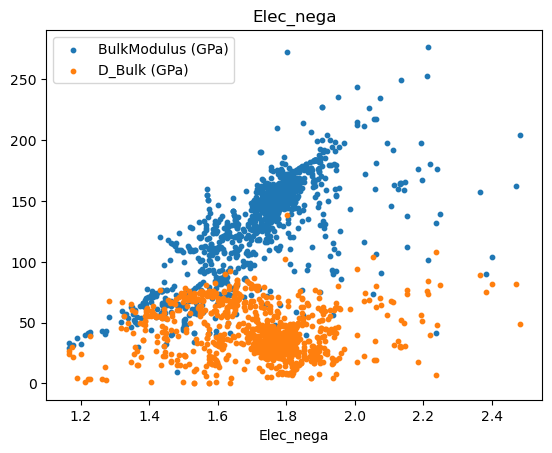

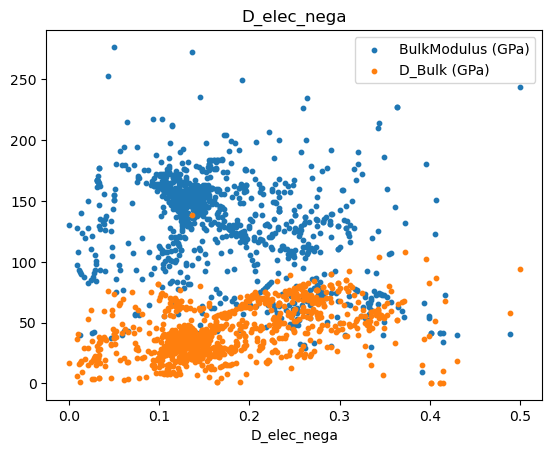

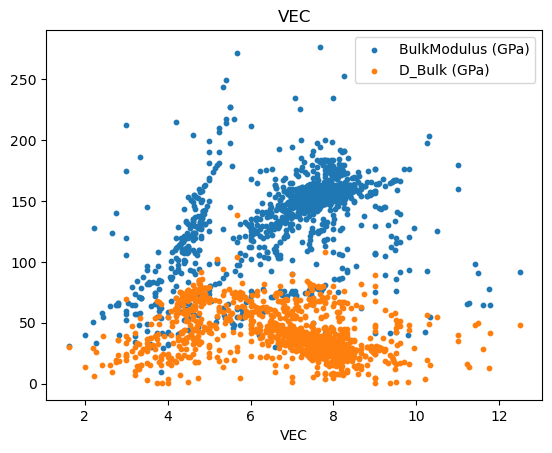

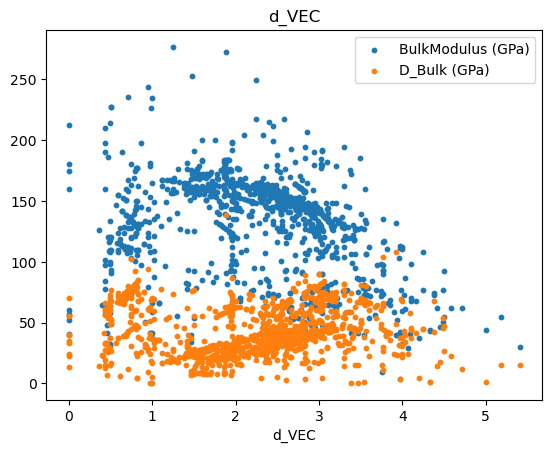

In [79]:
for p in properties:
    plt.figure()
    for y in y_col:
        plt.scatter(data[p], data[y], s=10, label=y)
    plt.xlabel(p)
    # plt.ylabel()
    plt.title(f'{p}')
    plt.legend()
    plt.show()